In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import src.hamiltonian as ham
import src.single_term as st

# Define Hamiltonian and initial state

In [57]:
L = 5
H = ham.TFI(L, 1, 1, 0)[0]
#H = ham.Z

In [58]:
all_0 = np.zeros(2**L)
all_0[0] = 1

In [59]:
L = np.linalg.eigh(H)[0]
print(L)

[-6.15536707e+00 -5.23606798e+00 -5.23606798e+00 -3.80422607e+00
 -3.80422607e+00 -3.23606798e+00 -3.23606798e+00 -2.47213595e+00
 -2.35114101e+00 -2.35114101e+00 -1.45308506e+00 -7.63932023e-01
 -7.63932023e-01 -1.16080038e-15 -5.85425316e-16  1.26514006e-16
  2.62376926e-16  1.27907023e-15  1.23606798e+00  1.23606798e+00
  1.45308506e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.35114101e+00  2.35114101e+00  3.80422607e+00
  3.80422607e+00  4.00000000e+00  6.15536707e+00  6.47213595e+00]


In [60]:
H.shape

(32, 32)

# Weak Measurement

In [61]:
Fs_WM = []
for _ in tqdm(range(1000)):
    Es, Fs, Xs, GS_WM = st.mbdite_algorithm(all_0, H, 0.12, (L[0] + L[1])/2, 1000, np.linalg.qr(np.random.rand(H.shape[0], H.shape[1]))[0], seed=-1)
    Fs_WM.append(Fs)

100%|██████████| 1000/1000 [01:16<00:00, 13.05it/s]


In [62]:
Fs_WM = np.array(Fs_WM)

In [63]:
Fs_WM.shape

(1000, 1001)

# Block Encoding

In [64]:
Fs_BE = []
for _ in tqdm(range(1000)):
    Es, Fs, Ms, GS_BE = st.hite_algorithm(all_0, H, 0.12, 1000, verbose=False, seed=-1)
    Fs_BE.append(Fs)

100%|██████████| 1000/1000 [02:54<00:00,  5.74it/s]


In [65]:
Fs_BE = np.array(Fs_BE)

Text(0.5, 0, 'Measurement Round')

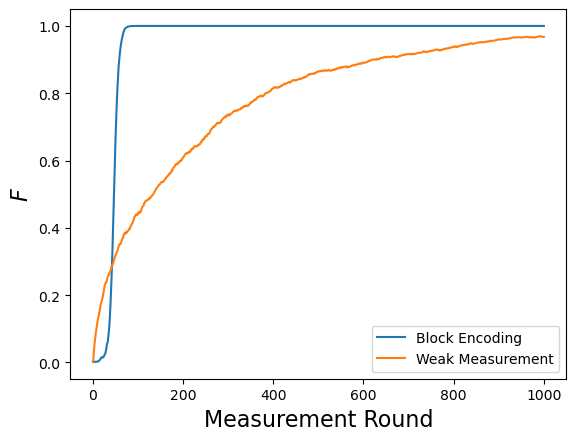

In [66]:
fig = plt.figure()
ax = fig.gca()

ax.plot(Fs_BE.mean(axis=0), label='Block Encoding')
ax.plot(Fs_WM.mean(axis=0), label='Weak Measurement')
ax.legend()
ax.set_ylabel(f'$F$', fontsize=16)
ax.set_xlabel('Measurement Round', fontsize=16)

Text(0.5, 0, 'Measurement Round')

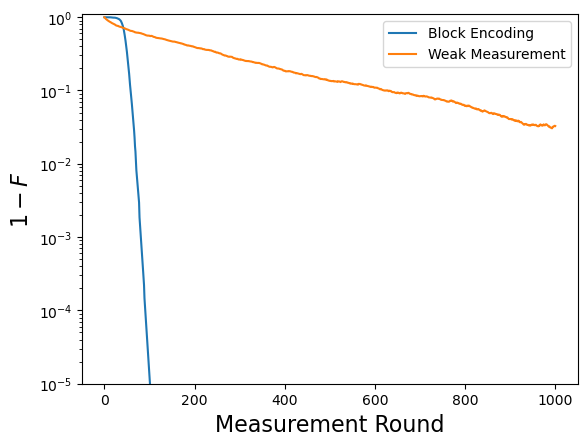

In [68]:
fig = plt.figure()
ax = fig.gca()

ax.plot(1 - Fs_BE.mean(axis=0), label='Block Encoding')
ax.plot(1 - Fs_WM.mean(axis=0), label='Weak Measurement')
ax.legend()
ax.set_yscale('log')
ax.set_ylim([1.e-5,1.1])
ax.set_ylabel(f'$1 - F$', fontsize=16)
ax.set_xlabel('Measurement Round', fontsize=16)